In [3]:
!pip install qiskit
!pip install qiskit-Aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.0 MB/s eta 0:00:00


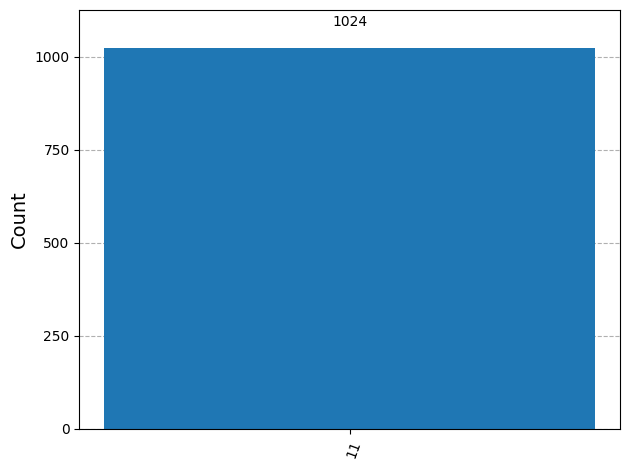

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
# from qiskit.providers.aer import execute # Import execute from here

qc = QuantumCircuit(2)
qc.h([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.z([0,1])
qc.cz(0,1)
qc.h([0,1])
qc.measure_all()

backend = Aer.get_backend('qasm_simulator')
# result = execute(qc, backend, shots=1024).result()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

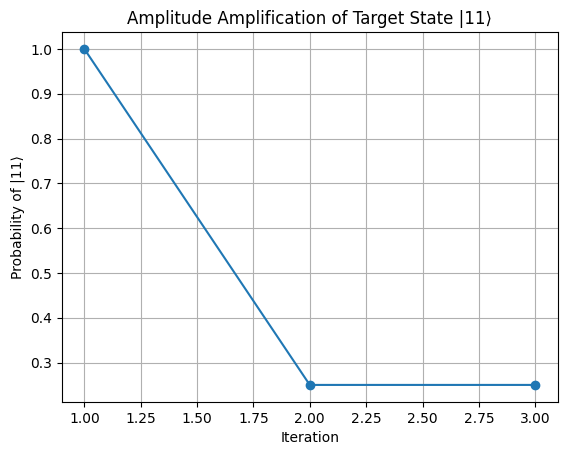

In [7]:
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

iterations = []
probabilities = []

qc_temp = QuantumCircuit(2)
qc_temp.h([0,1])

for i in range(3):  # 3 Grover iterations
    qc_temp.cz(0,1)
    qc_temp.h([0,1])
    qc_temp.z([0,1])
    qc_temp.cz(0,1)
    qc_temp.h([0,1])
    state = Statevector.from_instruction(qc_temp)
    probs = state.probabilities_dict()
    iterations.append(i+1)
    probabilities.append(probs.get('11', 0))

plt.plot(iterations, probabilities, marker='o')
plt.title('Amplitude Amplification of Target State |11⟩')
plt.xlabel('Iteration')
plt.ylabel('Probability of |11⟩')
plt.grid(True)
plt.show()


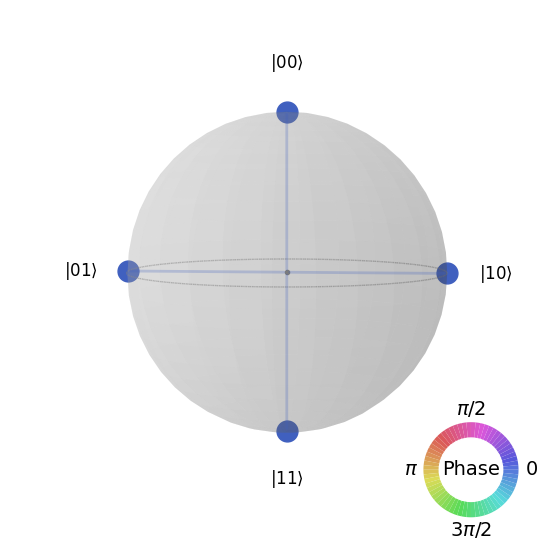

In [8]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(state)



In [12]:
!pip install pylatexenc

In [16]:
!pip install pylatexenc
!pip install qiskit matplotlib pylatexenc

In [17]:
# QFT example that works even if matplotlib isn't installed (uses text drawing)
from qiskit import QuantumCircuit
from math import pi

def qft(n):
    """Return a QuantumCircuit implementing the n-qubit Quantum Fourier Transform."""
    qc = QuantumCircuit(n, name=f"QFT_{n}")
    # apply H and controlled-phase gates
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            # controlled phase with control = j, target = i
            angle = pi / (2 ** (j - i))
            qc.cp(angle, j, i)
    qc.barrier()
    # swap qubits to reverse order (standard QFT end)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    return qc

# Build a 3-qubit QFT circuit
qc = qft(3)

# 1) Text drawing (always available)
print(qc.draw(output='text'))

# 2) Matplotlib drawing (only if matplotlib and pylatexenc are installed)
# If you don't have them, comment the next line out or install the packages shown above.
# qc.draw(output='mpl')   # Uncomment after installing matplotlib & pylatexenc

     ┌───┐                                      ░    
q_0: ┤ H ├─■────────■───────────────────────────░──X─
     └───┘ │P(π/2)  │       ┌───┐               ░  │ 
q_1: ──────■────────┼───────┤ H ├─■─────────────░──┼─
                    │P(π/4) └───┘ │P(π/2) ┌───┐ ░  │ 
q_2: ───────────────■─────────────■───────┤ H ├─░──X─
                                          └───┘ ░    
